In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import matplotlib.gridspec as gridspec
import scipy
from PIL import Image

Create decals shards from catalogs

In [4]:
# full_df = pd.read_csv('../data/decals/prepared_catalogs/decals_smooth_may/full_catalog.csv')

In [5]:
# full_df = pd.read_csv('/home/walml/repos/zoobot/data/decals_dr5_uploadable_master_catalog_nov_2019.csv')
full_df = pd.read_csv('/home/walml/repos/zoobot/data/classifications_2020_04_09_dedup.csv')

In [6]:
retired = full_df[full_df['smooth-or-featured_total-votes'] > 35]

(0.0, 30.0)

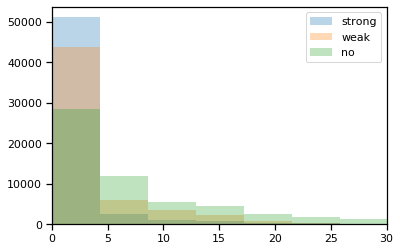

In [7]:
n_bins= 30
alpha = 0.3
_, bins, _ = plt.hist(retired['bar_strong'], bins=n_bins, alpha=alpha, label='strong')
plt.hist(retired['bar_weak'], bins=bins, alpha=alpha, label='weak')
plt.hist(retired['bar_no'], bins=bins, alpha=alpha, label='no')
plt.legend()
plt.xlim([0., 30.])

/home/walml/anaconda3/envs/agnfinder/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/walml/anaconda3/envs/agnfinder/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 1.0)

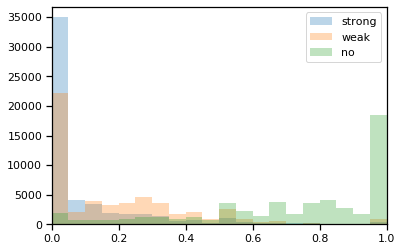

In [8]:
n_bins= 20
alpha = 0.3
_, bins, _ = plt.hist(retired['bar_strong_fraction'], bins=n_bins, alpha=alpha, label='strong')
plt.hist(retired['bar_weak_fraction'], bins=bins, alpha=alpha, label='weak')
plt.hist(retired['bar_no_fraction'], bins=bins, alpha=alpha, label='no')
plt.legend()
plt.xlim([0., 1.])

In [9]:
# del retired['file_loc']

In [10]:
# small_df = pd.merge(df[['id_str', 'file_loc']], retired, on='id_str', how='inner')

In [11]:
# len(small_df)

In [12]:
# small_df['file_loc'] = '/data/repos/zoobot/notebooks/' + small_df['file_loc']

In [13]:
# assert all(small_df['file_loc'].apply(os.path.exists))

In [14]:
# os.chdir('/data/repos/zoobot')

In [15]:
# small_df.to_csv('notebooks/decals_smooth_may_eval_shards/mac_catalog_correct_labels.csv', index=False)

In [16]:
# bar_df = small_df[small_df['bar_total-votes'] >= 10]
# bar_df.to_csv(tfrecord_csv_loc, index=False)
# tfrecord_csv_loc = '/data/repos/zoobot/notebooks/decals_smooth_may_eval_shards/mac_catalog_feat10_correct_labels.csv'

In [17]:
# eval_size = int(len(bar_df)/4)

In [18]:
# !python /data/repos/zoobot/make_decals_tfrecords.py --labelled-catalog={tfrecord_csv_loc} --eval-size={eval_size} --shard-dir=/data/repos/zoobot/data/decals/shards/multilabel --img-size 64

In [19]:
bar_df = retired[retired['bar_total-votes'] >= 10]
len(bar_df)

22103

In [20]:
eval_size = int(len(bar_df)/4)
img_size=256

In [21]:
tfrecord_csv_loc = '/home/walml/repos/zoobot/data/latest_labelled_catalog_{}.csv'.format(img_size)
bar_df.to_csv(tfrecord_csv_loc, index=False)

In [24]:
home = '/data/phys-zooniverse/chri5177'

In [25]:
!echo {home}/repos/zoobot/make_decals_tfrecords.py --labelled-catalog={tfrecord_csv_loc} --eval-size={eval_size} --shard-dir={home}/repos/zoobot/data/decals/shards/multilabel_{img_size} --img-size {img_size}

/data/phys-zooniverse/chri5177/repos/zoobot/make_decals_tfrecords.py --labelled-catalog=/home/walml/repos/zoobot/data/latest_labelled_catalog_256.csv --eval-size=5525 --shard-dir=/data/phys-zooniverse/chri5177/repos/zoobot/data/decals/shards/multilabel_256 --img-size 256


In [23]:
# !python /data/repos/zoobot/make_decals_tfrecords.py --labelled-catalog={tfrecord_csv_loc} --eval-size={eval_size} --shard-dir=/data/repos/zoobot/data/decals/shards/multilabel_{img_size} --img-size {img_size}

ERROR! Session/line number was not unique in database. History logging moved to new session 233
